# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjwal1/bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'two-classes'

data_config_spf = {
  "PH2" : True,
  "PH3" : False,
  "reducer": '',
  "kernel": '',
  "n": -1,
  "data_unit": sup.DATA_S_PF,
  "label_col": sup.class_numeric_column,
  "class_list": TRAIN_classes,
  "batch_size": 4096,
  "seq_len": 1,
  "input_dim": 87
}

data_config_spv = {
  "PH2" : True,
  "PH3" : False,
  "reducer": '',
  "kernel": '',
  "n": -1,
  "data_unit": sup.DATA_S_PV,
  "label_col": sup.class_numeric_column,
  "class_list": TRAIN_classes,
  "batch_size": 4096,
  "seq_len": sup.NUM_FRAMES_PER_VIDEO,
  "input_dim": 87
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_TINY,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 1000
}

In [5]:
spf_model = bert.BERT(data_config=data_config_spf, df=None, 
              train_config=train_config)

spv_model = bert.BERT(data_config=data_config_spv, df=None, 
              train_config=train_config)

## Train

In [6]:
spf_model.fit(verbose=True)

In [7]:
spv_model.fit(verbose=True)

## Evaluate

In [8]:
spf_model.score()

In [9]:
spv_model.score()

In [10]:
spf_model.accuracy

0.67578125

In [11]:
spv_model.accuracy

0.8372093023255814

## Plot loss

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


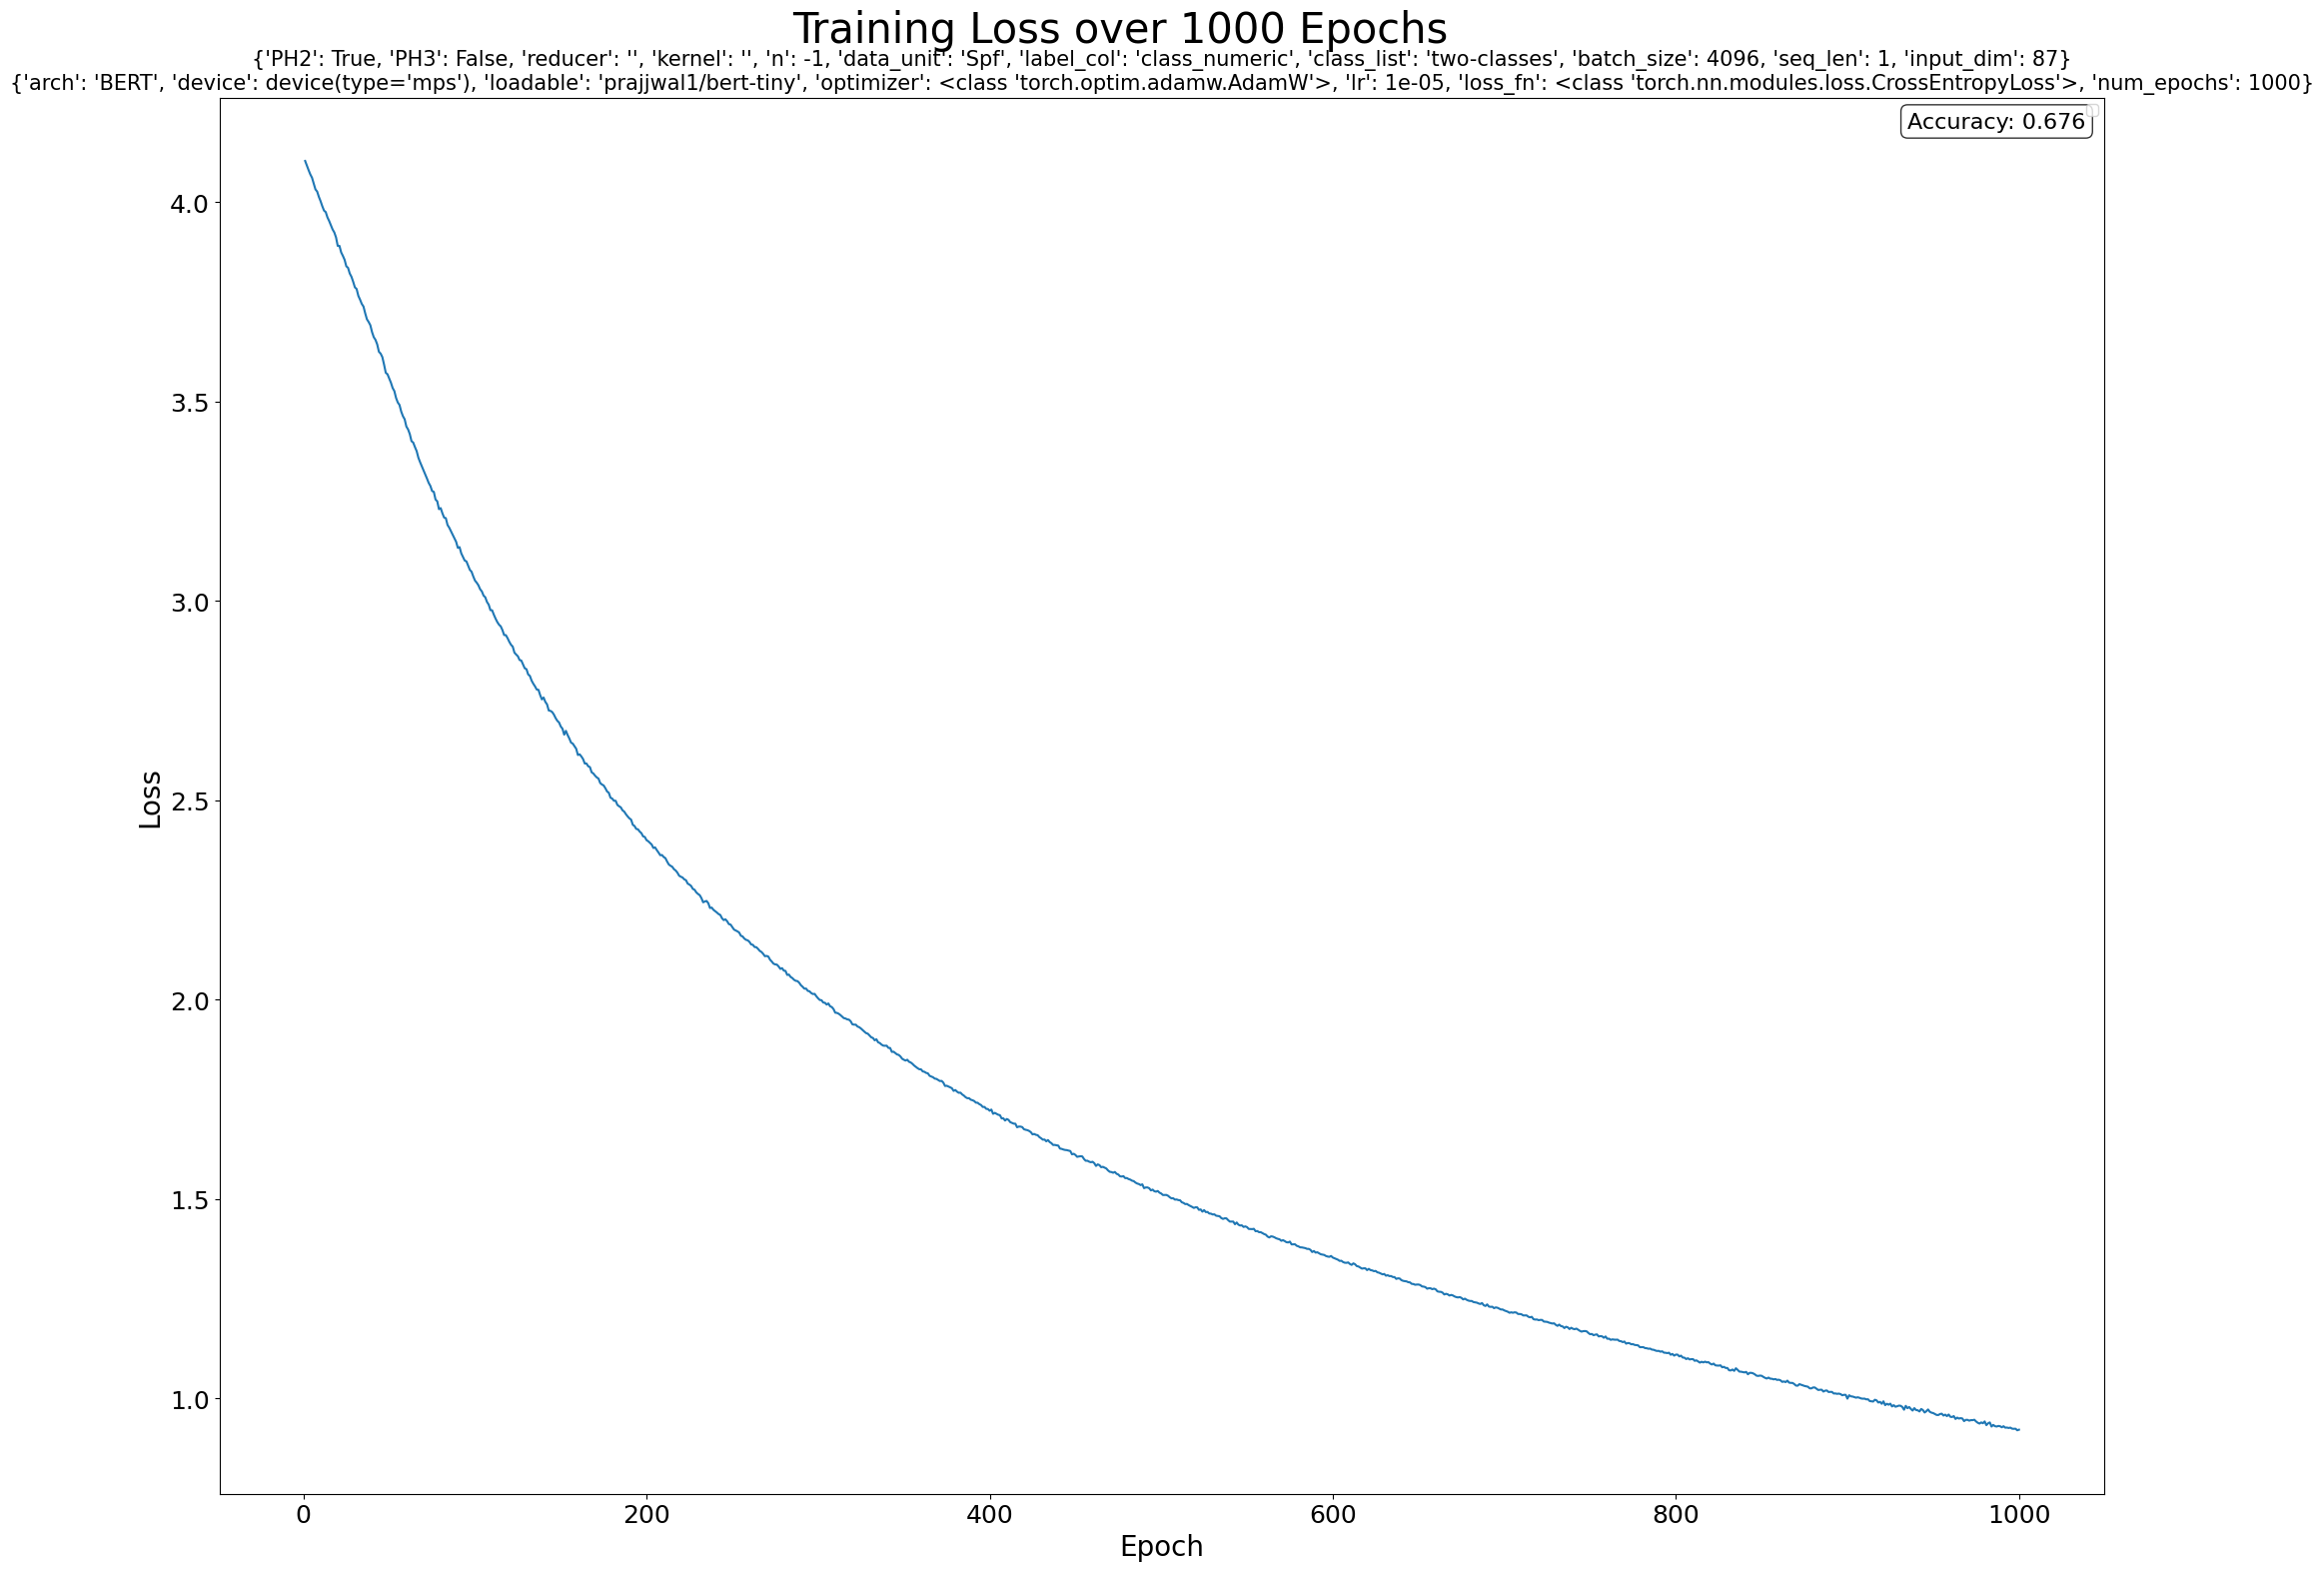

In [12]:
spf_model.plot_loss()

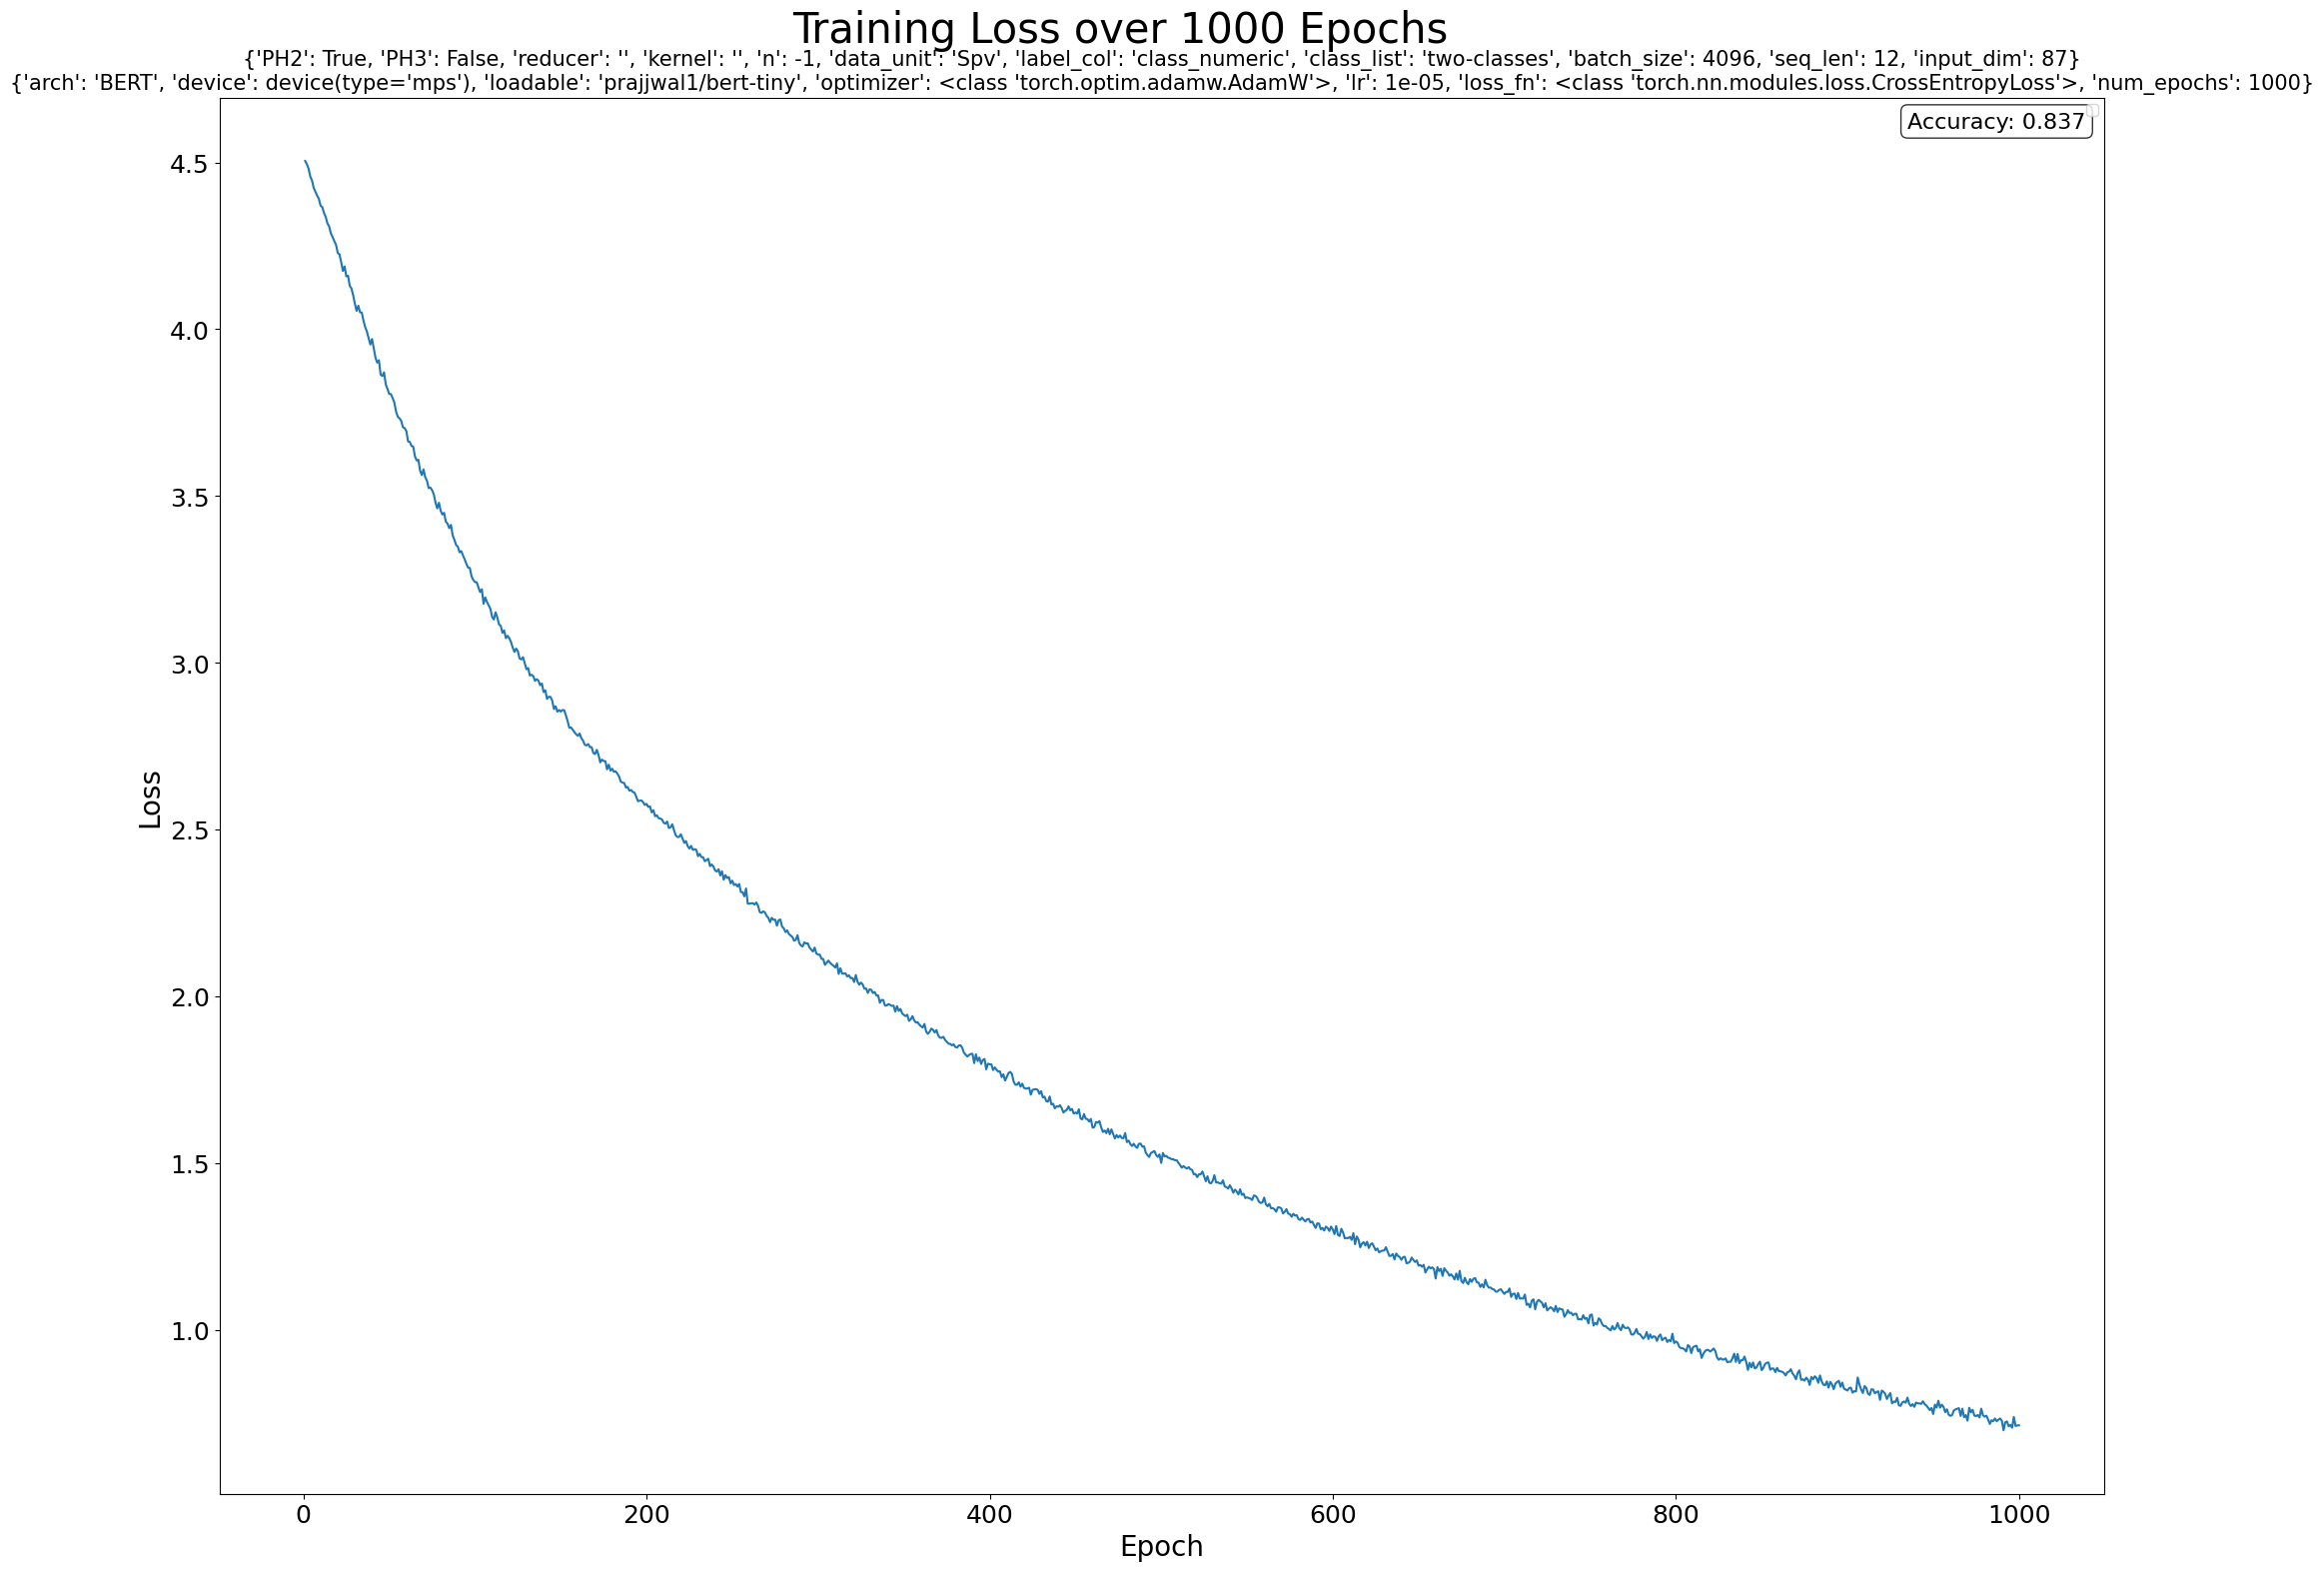

In [13]:
spv_model.plot_loss()

## Save

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/two-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/two-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution


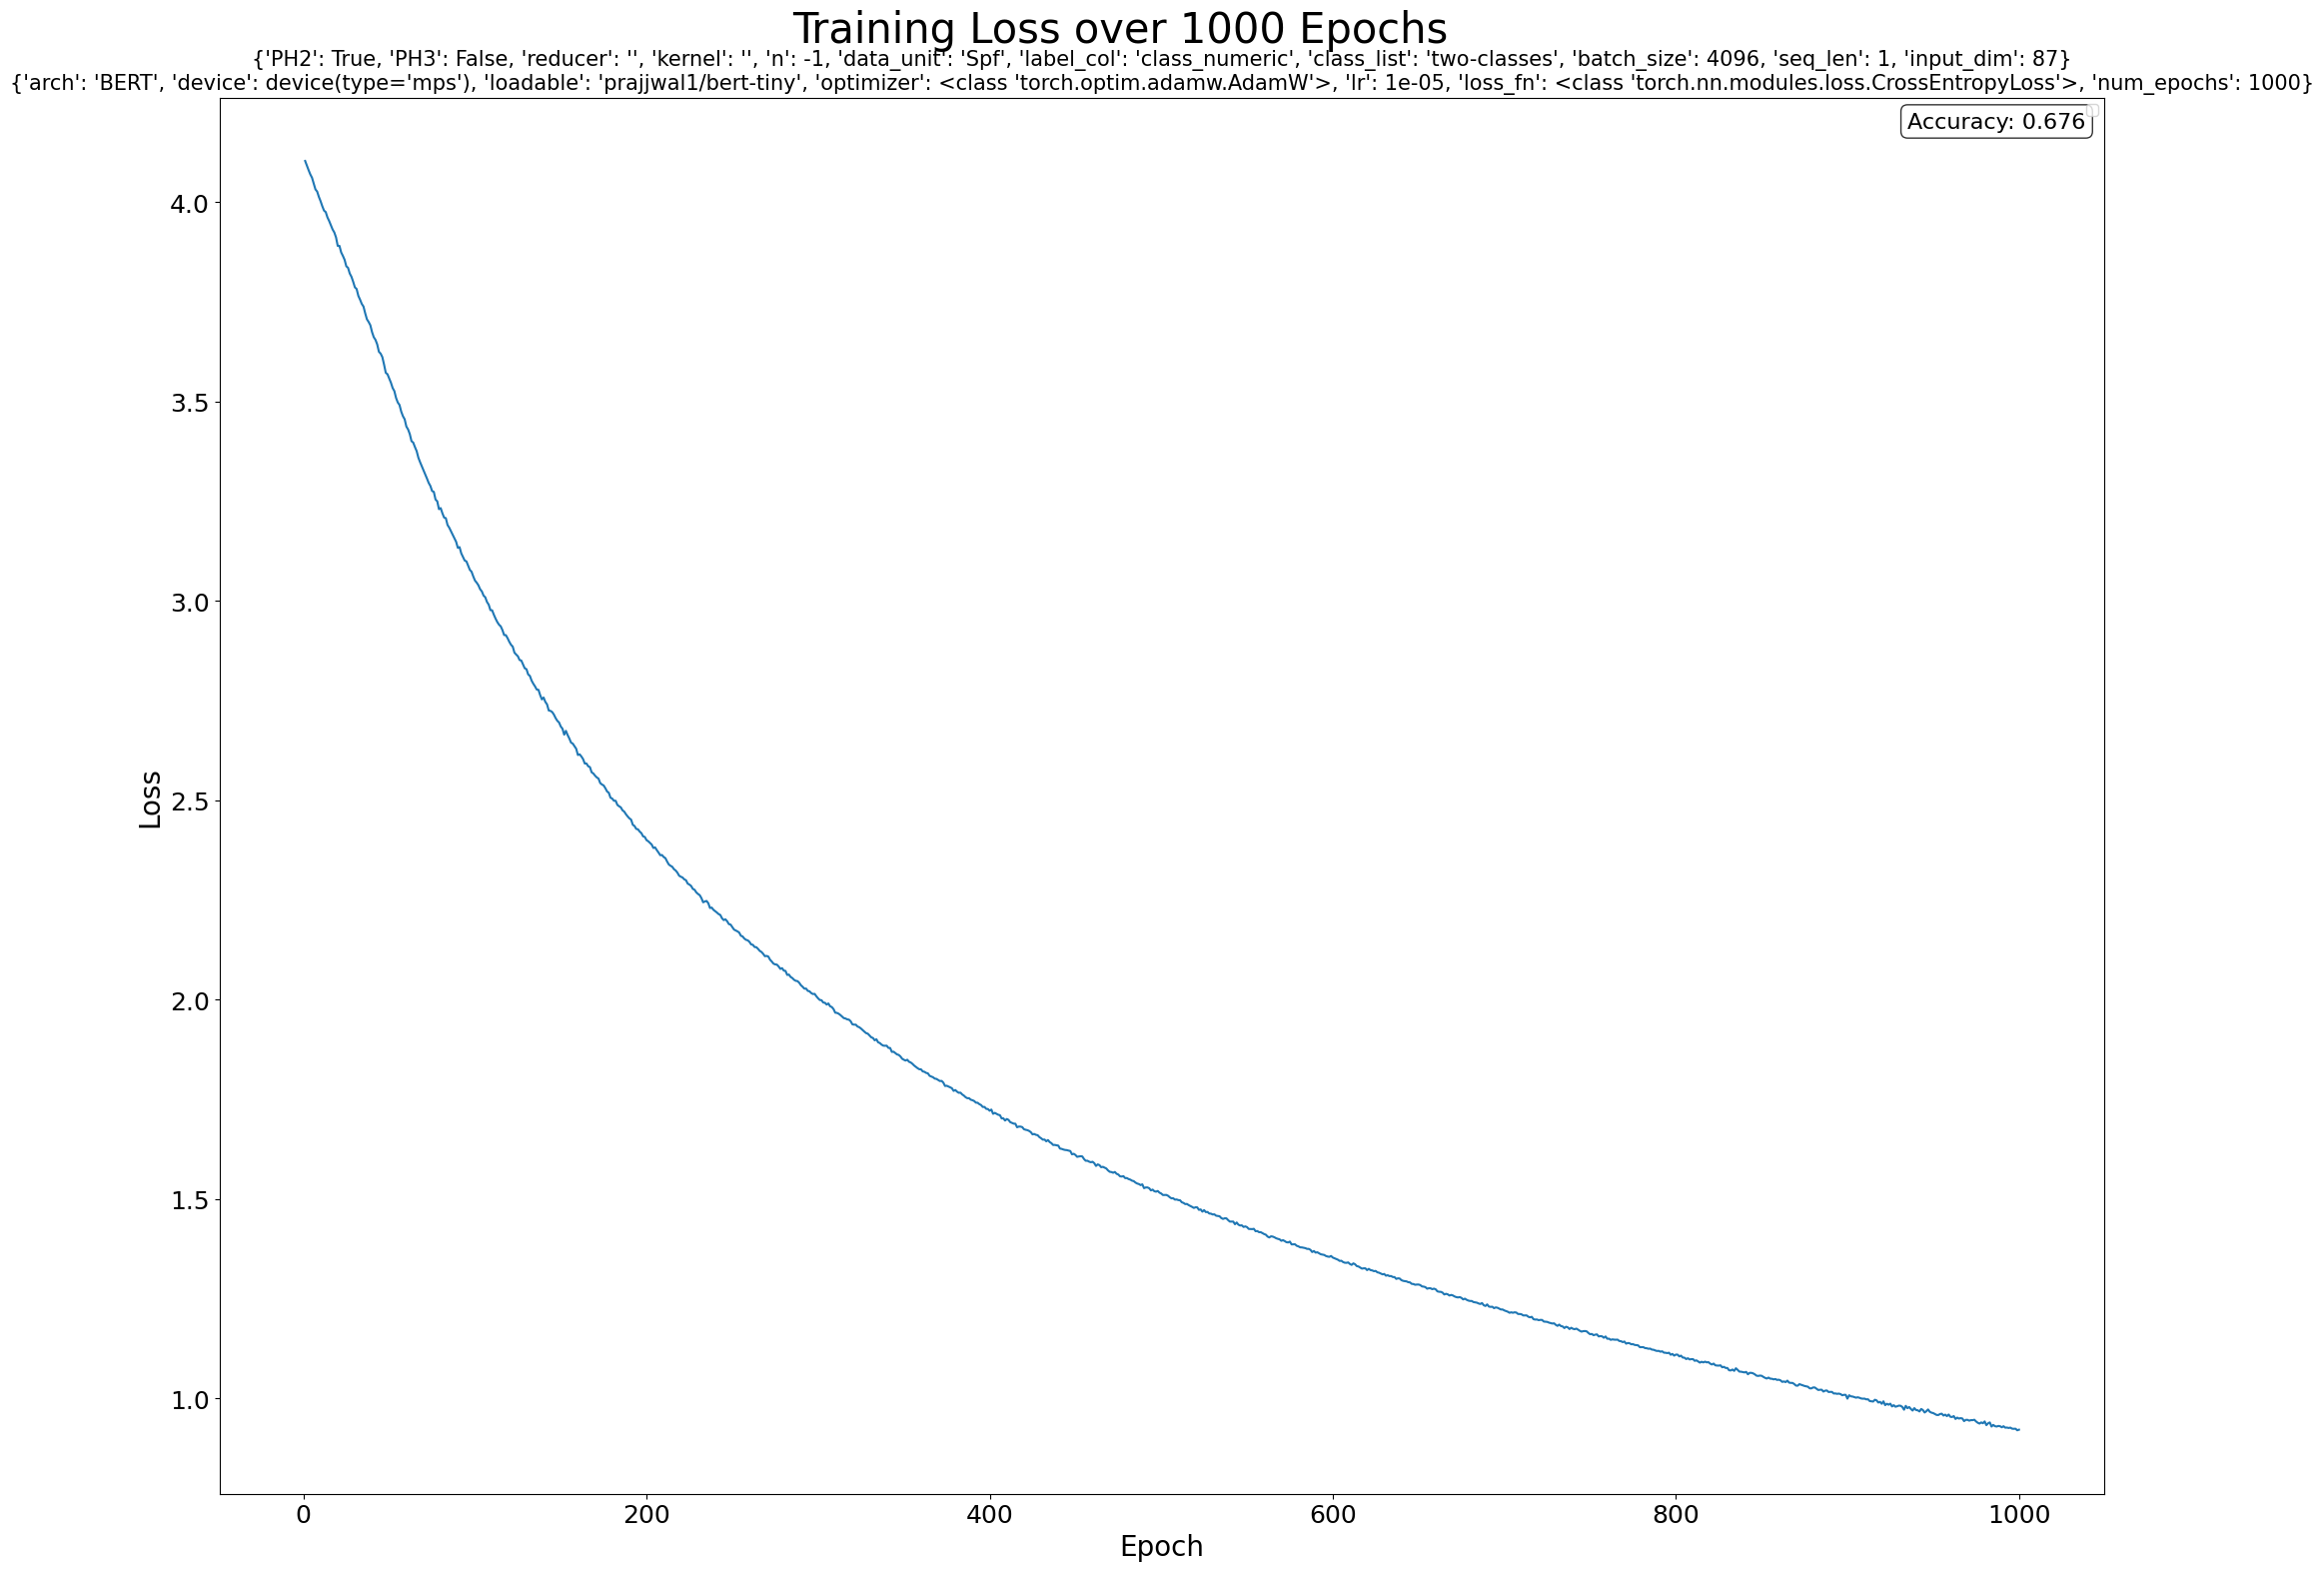

In [14]:
spf_model.keep()

Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/two-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/two-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


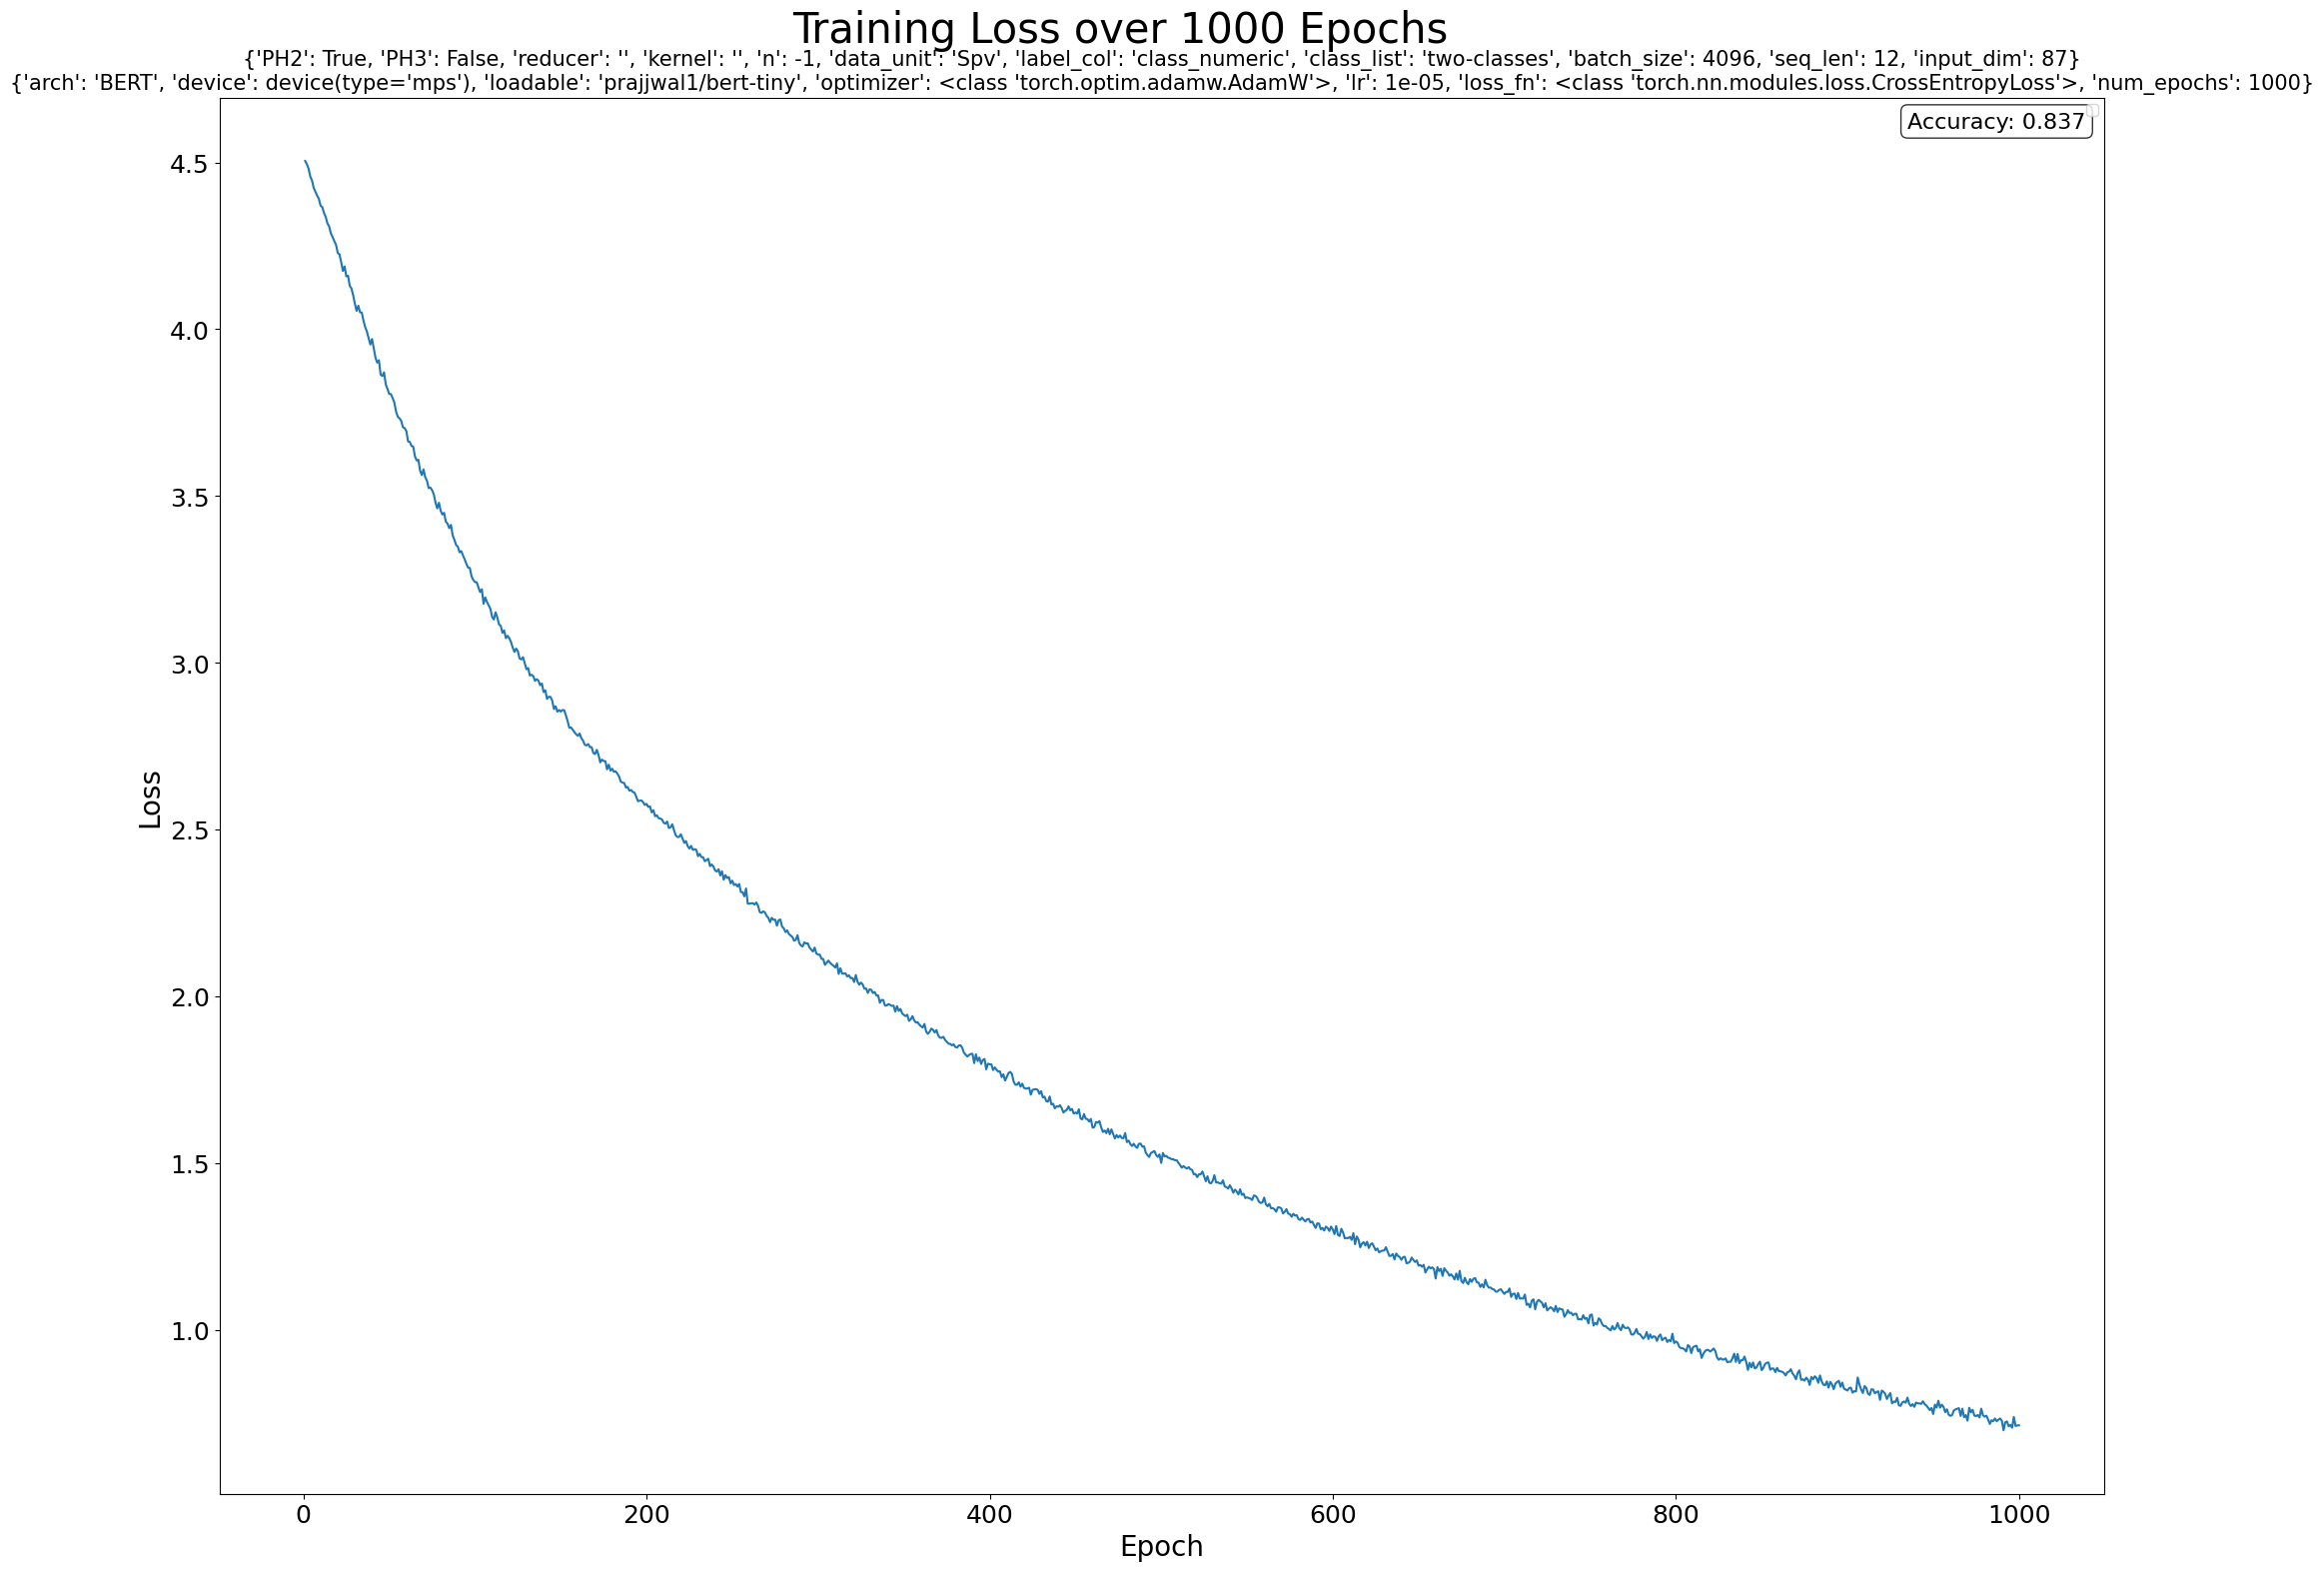

In [15]:
spv_model.keep()